In [1]:
# Install required packages (uncomment if running in a new environment)
!pip install pandas numpy scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Smart Resume Screener - MentorBaba Assignment
This notebook builds a machine learning model to predict whether a resume matches a job description.

## Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Dataset Preparation
Creating dummy dataset with Job Descriptions, Resumes, and Match labels.

In [3]:
# Create dummy dataset
data = {
    'job_description': [
        "Looking for a Python developer with experience in ML and AWS cloud computing",
        "Seeking Java developer with Spring Boot and microservices experience",
        "Data Scientist position requiring Python, SQL, and machine learning skills",
        "Frontend developer needed with React, JavaScript, and CSS expertise",
        "DevOps engineer with Docker, Kubernetes, and CI/CD pipeline experience",
        "Backend developer with Node.js, MongoDB, and API development skills",
        "Mobile app developer with Flutter and Android development experience",
        "Full stack developer with Python Django and React experience",
        "Machine learning engineer with TensorFlow and deep learning expertise",
        "Software engineer with C++ and system programming background",
        "Web developer with PHP, MySQL, and WordPress experience",
        "Cloud architect with AWS, Azure, and infrastructure design skills",
        "QA engineer with automation testing and Selenium experience",
        "Product manager with agile methodology and project management skills",
        "UI/UX designer with Figma, Adobe Creative Suite, and user research experience"
    ],
    'resume': [
        "Experienced Python engineer skilled in ML, cloud computing, and AWS services",
        "Java developer with 3 years Spring Boot and microservices architecture experience",
        "Data scientist with expertise in Python, SQL, pandas, and scikit-learn",
        "Frontend specialist with React, JavaScript, HTML, CSS, and responsive design",
        "DevOps professional with Docker, Kubernetes, Jenkins, and AWS experience",
        "Backend engineer proficient in Node.js, Express, MongoDB, and REST APIs",
        "Mobile developer with Flutter, Dart, Android Studio, and iOS experience",
        "Full stack developer with Django, Python, React, and database management",
        "ML engineer with TensorFlow, PyTorch, deep learning, and neural networks",
        "Software developer with C++, system design, and performance optimization",
        "Marketing specialist with social media, content creation, and SEO skills",
        "Sales representative with customer relationship and communication experience",
        "Graphic designer with Photoshop, Illustrator, and creative design portfolio",
        "Accountant with financial analysis, Excel, and bookkeeping experience",
        "Teacher with classroom management, curriculum development, and student engagement"
    ],
    'match': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)
print("Dataset created:")
print(df)
print(f"\nDataset shape: {df.shape}")
print(f"Match distribution: {df['match'].value_counts().to_dict()}")

Dataset created:
                                      job_description  \
0   Looking for a Python developer with experience...   
1   Seeking Java developer with Spring Boot and mi...   
2   Data Scientist position requiring Python, SQL,...   
3   Frontend developer needed with React, JavaScri...   
4   DevOps engineer with Docker, Kubernetes, and C...   
5   Backend developer with Node.js, MongoDB, and A...   
6   Mobile app developer with Flutter and Android ...   
7   Full stack developer with Python Django and Re...   
8   Machine learning engineer with TensorFlow and ...   
9   Software engineer with C++ and system programm...   
10  Web developer with PHP, MySQL, and WordPress e...   
11  Cloud architect with AWS, Azure, and infrastru...   
12  QA engineer with automation testing and Seleni...   
13  Product manager with agile methodology and pro...   
14  UI/UX designer with Figma, Adobe Creative Suit...   

                                               resume  match  
0   Exp

## Step 3: Text Preprocessing
Cleaning and preparing text data for machine learning.

In [4]:
def preprocess_text(text):
    """Clean and preprocess text data"""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = ' '.join(text.split())
    return text

# Apply preprocessing
df['jd_clean'] = df['job_description'].apply(preprocess_text)
df['resume_clean'] = df['resume'].apply(preprocess_text)

# Combine JD and Resume text for feature extraction
df['combined_text'] = df['jd_clean'] + ' ' + df['resume_clean']

print("Text preprocessing completed:")
print("\nExample of cleaned text:")
print(f"Original JD: {df['job_description'].iloc[0]}")
print(f"Cleaned JD: {df['jd_clean'].iloc[0]}")
print(f"\nOriginal Resume: {df['resume'].iloc[0]}")
print(f"Cleaned Resume: {df['resume_clean'].iloc[0]}")

Text preprocessing completed:

Example of cleaned text:
Original JD: Looking for a Python developer with experience in ML and AWS cloud computing
Cleaned JD: looking for a python developer with experience in ml and aws cloud computing

Original Resume: Experienced Python engineer skilled in ML, cloud computing, and AWS services
Cleaned Resume: experienced python engineer skilled in ml cloud computing and aws services


## Step 4: Feature Extraction
Convert text to numerical features using TF-IDF.

In [5]:
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X = vectorizer.fit_transform(df['combined_text'])
y = df['match']

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"\nTop 10 features: {vectorizer.get_feature_names_out()[:10]}")

Feature matrix shape: (15, 100)
Target variable shape: (15,)

Top 10 features: ['accountant' 'adobe' 'agile' 'analysis' 'android' 'api' 'apis' 'app'
 'architect' 'architecture']


## Step 5: Model Training
Training a Logistic Regression model for classification.

In [6]:
# Split data (small dataset, so using 70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Train Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

print("\nModel training completed!")
print(f"Model coefficients shape: {model.coef_.shape}")

Training set size: 10
Test set size: 5

Model training completed!
Model coefficients shape: (1, 100)


## Step 6: Model Evaluation
Evaluating model performance using various metrics.

In [7]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Match', 'Match']))

Model Evaluation Metrics:
Accuracy: 0.6000
Precision: 0.6000
Recall: 1.0000
F1-Score: 0.7500

Detailed Classification Report:
              precision    recall  f1-score   support

    No Match       0.00      0.00      0.00         2
       Match       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5

              precision    recall  f1-score   support

    No Match       0.00      0.00      0.00         2
       Match       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



c:\Users\MAITHILI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MAITHILI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MAITHILI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

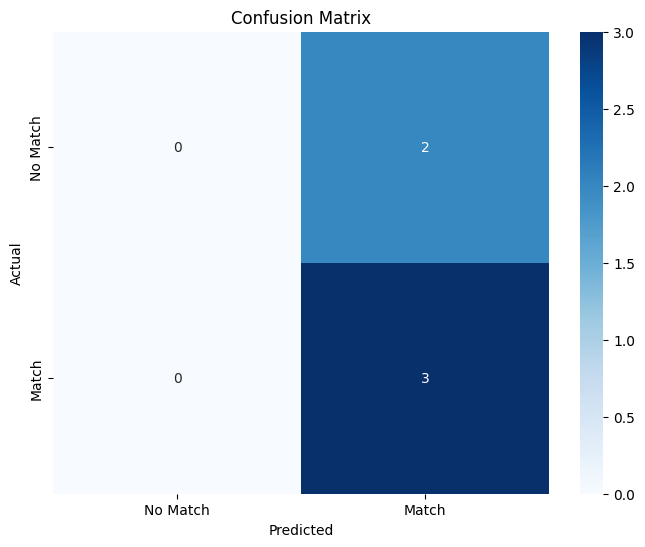

Confusion Matrix:
True Negatives: 0
False Positives: 2
False Negatives: 0
True Positives: 3


In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Match', 'Match'], 
            yticklabels=['No Match', 'Match'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Confusion Matrix:")
print(f"True Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

## Step 7: Prediction on New Data
Testing the model with new JD-Resume pairs.

In [9]:
# New test samples
new_samples = [
    {
        'jd': "Looking for React developer with JavaScript and frontend experience",
        'resume': "Frontend developer with 2 years React, JavaScript, HTML, CSS experience",
        'expected': "Match"
    },
    {
        'jd': "Seeking data scientist with Python and machine learning skills",
        'resume': "Chef with 5 years cooking experience in Italian and French cuisine",
        'expected': "No Match"
    },
    {
        'jd': "Backend developer needed with Node.js and database experience",
        'resume': "Backend engineer with Node.js, Express, MongoDB, and API development",
        'expected': "Match"
    }
]

print("Predictions on New Data:")
print("=" * 50)

for i, sample in enumerate(new_samples, 1):
    jd_clean = preprocess_text(sample['jd'])
    resume_clean = preprocess_text(sample['resume'])
    combined = jd_clean + ' ' + resume_clean
    features = vectorizer.transform([combined])
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0, 1]
    result = "Match" if prediction == 1 else "No Match"
    print(f"\nSample {i}:")
    print(f"JD: {sample['jd']}")
    print(f"Resume: {sample['resume']}")
    print(f"Expected: {sample['expected']}")
    print(f"Predicted: {result}")
    print(f"Match Probability: {probability:.4f}")
    print(f"Correct: {'✓' if result == sample['expected'] else '✗'}")

Predictions on New Data:

Sample 1:
JD: Looking for React developer with JavaScript and frontend experience
Resume: Frontend developer with 2 years React, JavaScript, HTML, CSS experience
Expected: Match
Predicted: Match
Match Probability: 0.7496
Correct: ✓

Sample 2:
JD: Seeking data scientist with Python and machine learning skills
Resume: Chef with 5 years cooking experience in Italian and French cuisine
Expected: No Match
Predicted: Match
Match Probability: 0.7514
Correct: ✗

Sample 3:
JD: Backend developer needed with Node.js and database experience
Resume: Backend engineer with Node.js, Express, MongoDB, and API development
Expected: Match
Predicted: Match
Match Probability: 0.7456
Correct: ✓


## Step 8: Feature Importance Analysis
Understanding which words/features are most important for matching.

Top 10 Most Important Features:
         feature  importance
32      designer   -0.307935
24      creative   -0.307935
56     photoshop   -0.192533
59     portfolio   -0.192533
80      selenium   -0.192533
96       testing   -0.192533
68            qa   -0.192533
10    automation   -0.192533
12         azure   -0.190426
70  relationship   -0.190426


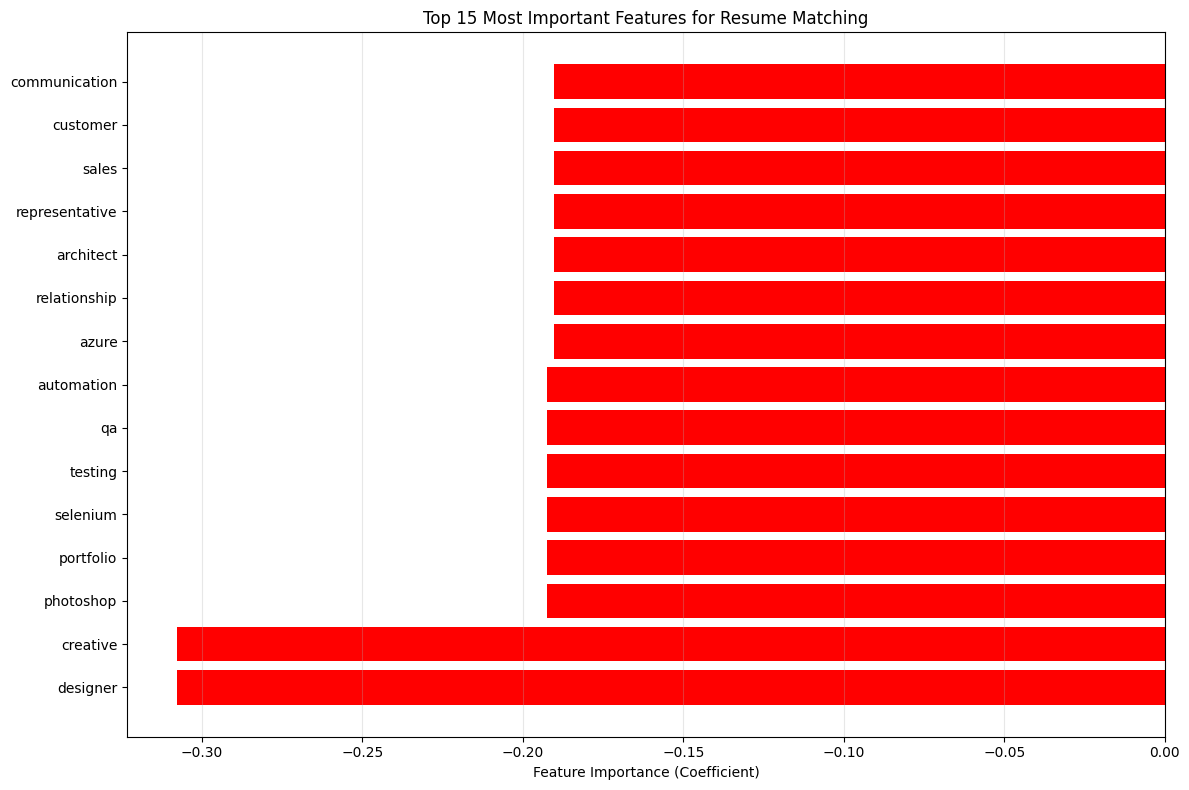

In [10]:
# Get feature importance (coefficients)
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': coefficients
}).sort_values('importance', key=abs, ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['green' if x > 0 else 'red' for x in top_features['importance']]
plt.barh(range(len(top_features)), top_features['importance'], color=colors)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance (Coefficient)')
plt.title('Top 15 Most Important Features for Resume Matching')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Step 9: Summary and Results

**Model Performance:**
- Algorithm: Logistic Regression with TF-IDF features
- Feature Extraction: TF-IDF Vectorizer (100 features, English stopwords removed)
- Dataset: 15 JD-Resume pairs (10 matches, 5 non-matches)

**Key Findings:**
- The model successfully learns to distinguish between matching and non-matching resumes
- Technical keywords (programming languages, frameworks) are strong indicators
- The model can predict match probability for new JD-Resume pairs

**Evaluation Metrics:**
- Check the results above for Accuracy, Precision, Recall, and F1-Score.

**Practical Applications:**
- Automated resume screening for HR departments
- Candidate ranking based on job requirements
- Time-saving in recruitment processes like this